# 1 Setup and load data

### 1.1 Install dependancies and Setup

In [ ]:
import tensorflow as tf
import os

In [6]:
import cv2
from matplotlib import pyplot as plt
import imghdr

C:\Users\Marah\AppData\Local\Temp\ipykernel_1428\2859461022.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'data'

In [8]:
img = cv2.imread(os.path.join('data','happy','154006829.jpg'))

In [9]:
from PIL import Image



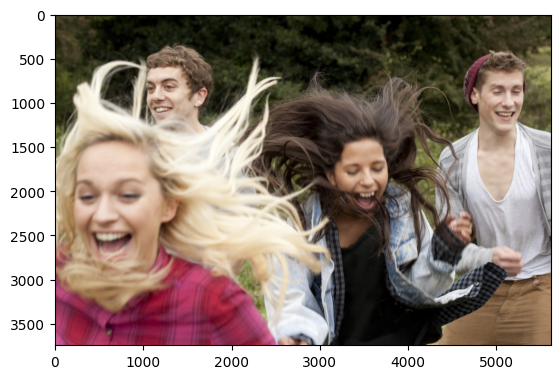

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

### 1.2 Remove Dodgy Images

In [11]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            img_file = Image.open(image_path)
            tip = img_file.format.lower()
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.foramt(image_path))



### 1.3 Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 171 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000028AD4EF61D0>)

In [16]:
# get another batch
batch = data_iterator.next()
# batch[0] contains images
# batch[1] contains labels

In [17]:
batch[0].shape

(32, 256, 256, 3)

In [18]:
batch[1]
# 1 = sad
# 0 = happy

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0])

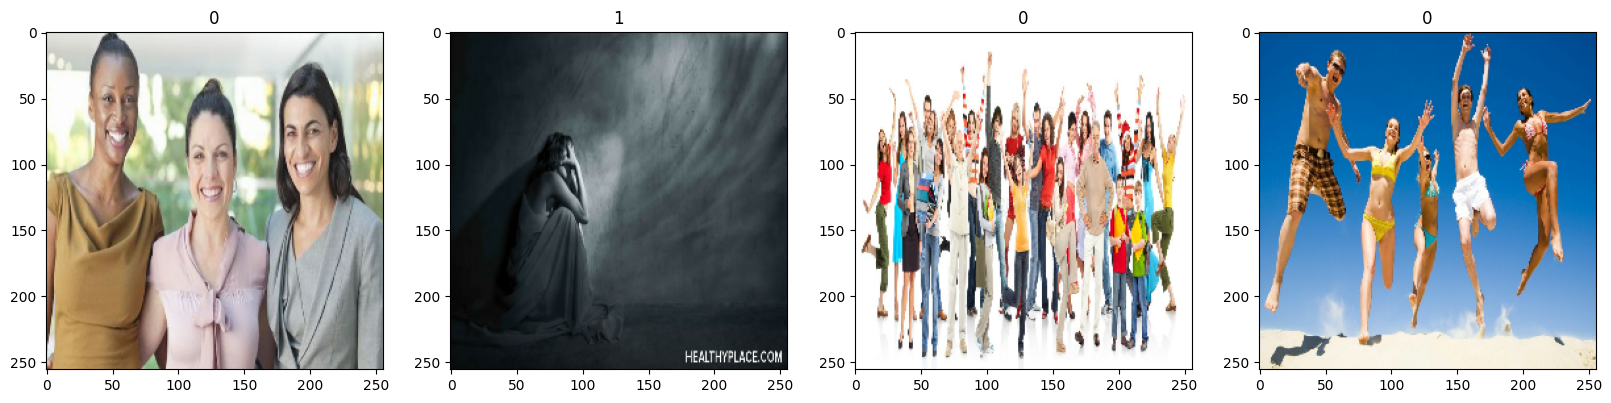

In [19]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2 Preprocessing

### 2.1 Scale Data

In [20]:
data = data.map(lambda x,y: (x/255, y))
#applies transfomation over all data
#lambda inline function

In [21]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

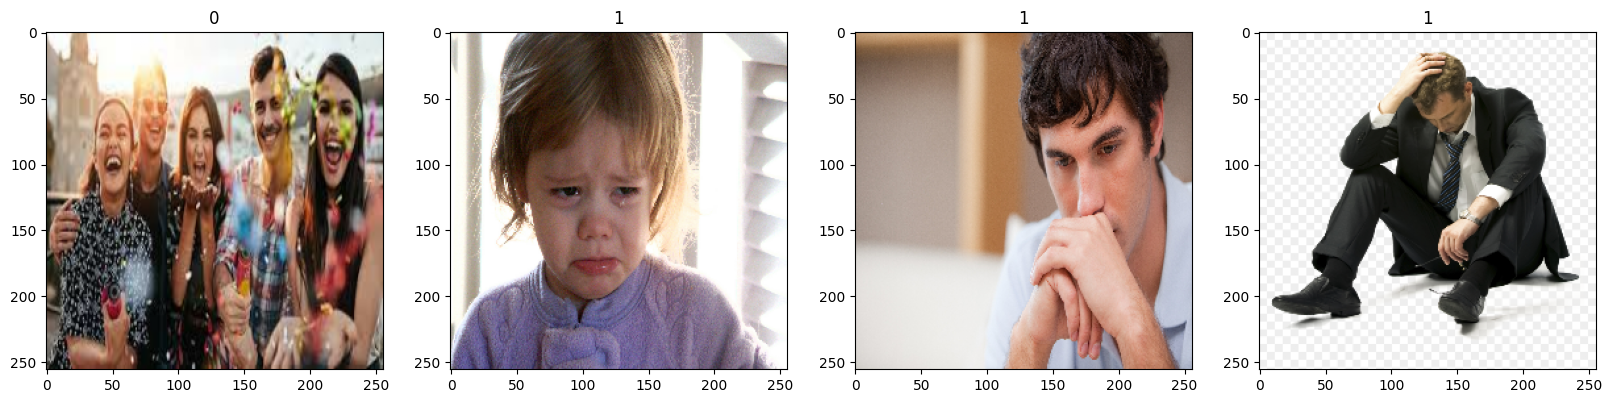

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 2.2 Split Data

In [23]:
len(data)

6

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [25]:
train_size

4

In [26]:
train_size+val_size+test_size

6

In [27]:
train = data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

# 3 Model

### 3.1 Build deep learning model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()

In [30]:
Conv2D??

Init signature:
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Source:        
@keras_export(["keras.layers.Conv2D", "keras.layers.Convolution2D"])
class Conv2D(BaseConv):
    """2D convolution layer.

    This layer creates a convolution kernel that is convolved with the layer
    input over a single spatial (or temporal) dimension to produce a tensor of
    outputs. If `use_bias` is True, a bias vector is created and added to the
    outputs. Finally, if `activation` is not `None`, it is applied to the
    outputs as well.

    Args:
        filters: int, the dimension of the output space (the number of filters
            in th

In [31]:
model.add(Conv2D(16,(3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten()) #30*30*16 

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

C:\Users\Marah\deep-learning-v2-pytorch-master\deep-learning\imgClassification\imgClassification\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'] )

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### 3.2 Train

In [34]:
logdir = 'logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4844 - loss: 1.0920 - val_accuracy: 0.6562 - val_loss: 0.5961
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6073 - loss: 0.6605 - val_accuracy: 0.7500 - val_loss: 0.5783
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 775ms/step - accuracy: 0.7594 - loss: 0.5999 - val_accuracy: 0.5312 - val_loss: 0.5981
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 700ms/step - accuracy: 0.6375 - loss: 0.5422 - val_accuracy: 0.7812 - val_loss: 0.4776
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 801ms/step - accuracy: 0.7771 - loss: 0.4889 - val_accuracy: 0.6875 - val_loss: 0.5094
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 695ms/step - accuracy: 0.7396 - loss: 0.4504 - val_accuracy: 0.8750 - val_loss: 0.4102
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 759ms/step - accuracy: 0.8500 - loss: 0.3898 - val_accuracy: 0.7500 - val_loss: 0.3810
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 750ms/step - accuracy: 0.8677 - loss: 0.2978 - val_accuracy: 0.9062 - val_loss: 0.27

### 3.3 Plot Performance

In [37]:
hist.history

{'accuracy': [0.4609375,
  0.6015625,
  0.78125,
  0.6015625,
  0.7734375,
  0.75,
  0.8203125,
  0.90625,
  0.890625,
  0.8515625,
  0.9140625,
  0.9609375,
  0.9921875,
  0.9765625,
  0.9921875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.0896291732788086,
  0.6667084097862244,
  0.5960445404052734,
  0.5632048845291138,
  0.4901280105113983,
  0.4502827525138855,
  0.3745834529399872,
  0.2898082435131073,
  0.2780303955078125,
  0.26689109206199646,
  0.27200746536254883,
  0.1905873566865921,
  0.1315361112356186,
  0.08917620778083801,
  0.06299939751625061,
  0.03352775052189827,
  0.02174198441207409,
  0.016042929142713547,
  0.013388675637543201,
  0.006855306681245565],
 'val_accuracy': [0.65625,
  0.75,
  0.53125,
  0.78125,
  0.6875,
  0.875,
  0.75,
  0.90625,
  0.84375,
  0.9375,
  1.0,
  0.96875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.5961031317710876,
  0.5782872438430786,
  0.5981324911117554,
  0.47762253880500793,
  0.5093553066

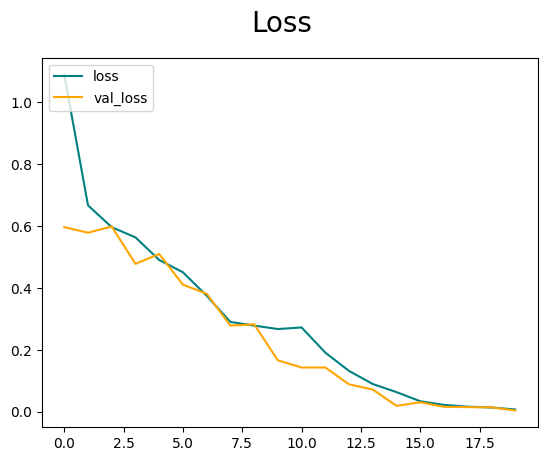

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc='upper left')
plt.show()

if the loss goes down and the  val loss starts going up it might be a sign of overfitting. apply regularization or alter data.
if the loss isnt going down, training isnt happening. training data might be unsuitable. 

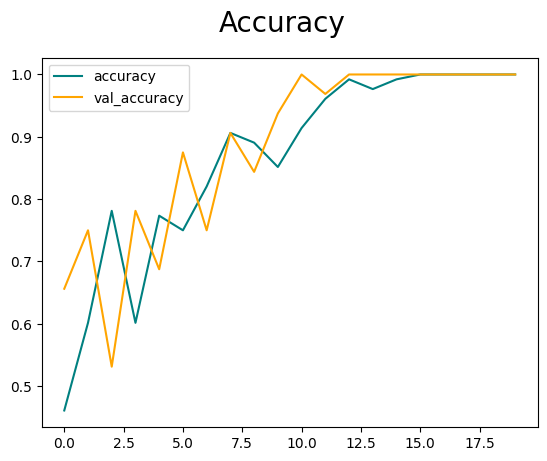

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc='upper left')
plt.show()

# 4 Performance Evaluation

### 4.1 Evaluate

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [41]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [42]:
len(test)

1

In [43]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


In [44]:
print(f'Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {accuracy.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


### 4.2 Test

In [46]:
import cv2

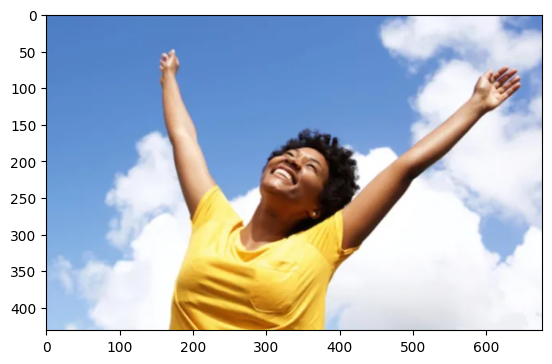

In [80]:
img = cv2.imread('../imgClassification/data/happytest.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

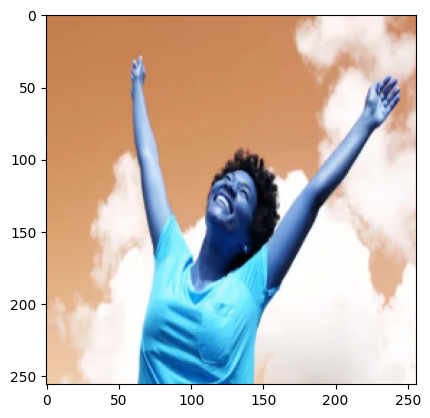

In [81]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [82]:
np.expand_dims(resize, 0).shape
#encapsulating with another set of parenthesis to get passed to the model for prediction

(1, 256, 256, 3)

In [83]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [84]:
yhat

array([[0.15274225]], dtype=float32)

In [85]:
if yhat > 0.5:
    print('predicted class is sad')
else:
    print('predicted class is happy')

predicted class is happy


# Save Model

### 5.1 Save model

In [86]:
from tensorflow.keras.models import load_model

In [87]:
model.save(os.path.join('models','happysadmodel.h5'))

### 5.2 Load Model

In [89]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [92]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [94]:
yhat

array([[0.15274225]], dtype=float32)

In [93]:
if yhat > 0.5:
    print('predicted class is sad')
else:
    print('predicted class is happy')

predicted class is happy
